In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [13]:
with h5py.File('ED.hdf5', 'r') as ed:
    m = np.array(ed['mix/matrix'][:]).T
    c = [c.decode() for c in list(ed['mix/c'][:])[0]]

In [14]:
mix = pd.DataFrame(data=m, columns=c)

In [15]:
mix = mix.drop(columns=['costs', 'Gluc_ext.x1', 'Gluc_ext.x2', 'Gluc_ext.x3'])

In [16]:
print(mix)

    [1,2-13C]-Gluc  [U-13C]-Gluc  [NL-13c]-Gluc  [5-13C]-Gluc  \
0              0.0           0.0            0.0           1.0   
1              0.0           0.0            0.2           0.8   
2              0.0           0.0            0.4           0.6   
3              0.0           0.0            0.6           0.4   
4              0.0           0.0            0.8           0.2   
5              0.0           0.0            1.0           0.0   
6              0.0           0.2            0.0           0.8   
7              0.0           0.2            0.2           0.6   
8              0.0           0.2            0.4           0.4   
9              0.0           0.2            0.6           0.2   
10             0.0           0.2            0.8           0.0   
11             0.0           0.4            0.0           0.6   
12             0.0           0.4            0.2           0.4   
13             0.0           0.4            0.4           0.2   
14             0.0       

In [17]:
mix = mix.sort_values(by='information index')

In [18]:
mix = mix.reset_index()

In [19]:
print(mix)

    index  [1,2-13C]-Gluc  [U-13C]-Gluc  [NL-13c]-Gluc  [5-13C]-Gluc  \
0      55             1.0           0.0            0.0           0.0   
1      54             0.8           0.2            0.0           0.0   
2      53             0.8           0.0            0.2           0.0   
3      52             0.8           0.0            0.0           0.2   
4      50             0.6           0.2            0.2           0.0   
5      49             0.6           0.2            0.0           0.2   
6      51             0.6           0.4            0.0           0.0   
7      11             0.0           0.4            0.0           0.6   
8       6             0.0           0.2            0.0           0.8   
9      44             0.4           0.4            0.2           0.0   
10     41             0.4           0.2            0.2           0.2   
11     26             0.2           0.2            0.0           0.6   
12     42             0.4           0.2            0.4          

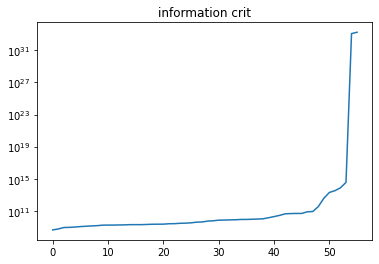

In [20]:
mix['information index'].plot(logy=True, title='information crit')
plt.show()

In [26]:
# best and worst mixes (except the really bad ones such as only U-13C or unlabeled Gluc:
print(mix.loc[[0, 52, 53]])

    index  [1,2-13C]-Gluc  [U-13C]-Gluc  [NL-13c]-Gluc  [5-13C]-Gluc  \
0      55             1.0           0.0            0.0           0.0   
52     10             0.0           0.2            0.8           0.0   
53     19             0.0           0.8            0.2           0.0   

    information index  
0        4.593213e+08  
52       7.881017e+13  
53       3.706683e+14  
